# <span style='color:Blue'> Exportaciones de Bienes y Servicios en las Gestiones 2019 y 2020 </span>

#### Las exportaciones de Bienes y Servicios de Bolivia se expresan en millones de dolares

### Informacion en formato .csv de mi repositorio en GitHubGist

In [1]:
import seaborn as sns
import pandas as pd
url = "https://gist.githubusercontent.com/WilderGitHub/77aa750c28f1fc76ec90209736327961/raw/74174c69a0d73ddb28d302eb270f2198667a4b8f/exportaciones.csv"
exportaciones = c=pd.read_csv(url,sep=';')
#exportaciones = pd.read_csv('data/exportaciones1.csv',sep=';')
exportaciones.head()


,Gestion,Mes,Destino,Concepto,Valor
0,2019,1,Brasil,Servicios,51
1,2019,2,Brasil,Servicios,81
2,2019,3,Brasil,Servicios,69
3,2019,4,Brasil,Servicios,39
4,2019,5,Brasil,Servicios,37


## Exportaciones totales por gestion
    

#### Destaca la disminución del valor promedio de exportaciones de bienes y servicios en la gestión 2020 debido a las restricciones de movilidad debido a la emergencia sanitaria

In [2]:
exportaciones.pivot_table('Valor', index='Destino', columns=['Concepto','Gestion']).sum().unstack()


Gestion,2017,2018,2019,2020
Concepto,,,,
Bienes,364.916667,358.000000,407.500000,393.250000
Servicios,344.833333,359.166667,410.083333,397.416667


## Análisis por Destino

## Media del total exportaciones por destino y gestion

#### El destino principal de exportaciones de Bienes y Servicios en la gestion 2020 fue Peru

In [3]:
destino = exportaciones.groupby(['Destino', 'Gestion'])['Valor'].aggregate('mean').unstack()
destino.sort_values(destino.columns[3],ascending=False,inplace=True)
destino


Gestion,2017,2018,2019,2020
Destino,,,,
Peru,51.333333,51.208333,34.625000,61.458333
China,49.958333,52.875000,70.625000,60.625000
Colombia,48.875000,43.083333,31.375000,58.416667
Argentina,53.541667,54.583333,53.750000,58.166667
EEUU,48.125000,49.083333,70.125000,56.416667
Brasil,52.166667,53.000000,69.166667,50.625000
Europa,50.875000,54.750000,79.125000,49.625000


## La media de exportaciones por rubro

In [4]:
exportaciones.pivot_table('Valor', index=['Gestion','Concepto'], columns=['Destino'],aggfunc={'Valor':'mean'})

Destino            Argentina     Brasil      China   Colombia       EEUU  \
Gestion Concepto                                                           
2017    Bienes     51.083333  51.833333  53.250000  50.083333  45.333333   
        Servicios  56.000000  52.500000  46.666667  47.666667  50.916667   
2018    Bienes     55.166667  50.250000  51.750000  44.083333  48.916667   
        Servicios  54.000000  55.750000  54.000000  42.083333  49.250000   
2019    Bienes     48.916667  69.000000  74.583333  31.250000  68.583333   
        Servicios  58.583333  69.333333  66.666667  31.500000  71.666667   
2020    Bienes     65.166667  45.666667  60.583333  51.916667  54.833333   
        Servicios  51.166667  55.583333  60.666667  64.916667  58.000000   

Destino               Europa       Peru  
Gestion Concepto                         
2017    Bienes     57.750000  55.583333  
        Servicios  44.000000  47.083333  
2018    Bienes     56.416667  51.416667  
        Servicios  53.083333  51.000000  
2019    Bienes     78.833333  36.333333  
        Servicios  79.416667  32.916667  
2020    Bienes     50.750000  64.333333  
        Servicios  48.500000  58.583333

## Exportaciones promedio mensual

#### Las exportaciones totales promedio por mes tienen un fuerte componente estacional debido a la alta demanda de  bienes y servicios a fin de gestion

Text(0, 0.5, 'Millones de USD')

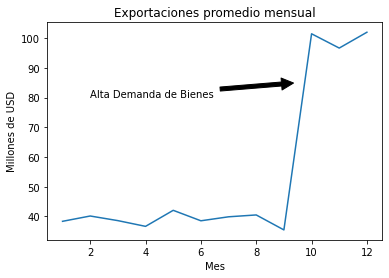

In [5]:
mensual =exportaciones.groupby(['Mes'])['Valor'].aggregate('mean')

ax=mensual.plot()
ax.annotate('Alta Demanda de Bienes', xy=(9.5, 85), xytext=(2, 80), arrowprops=dict(facecolor='black', shrink=0.05))
ax.set_title("Exportaciones promedio mensual")
ax.set_ylabel("Millones de USD")

Text(0, 0.5, 'Exportaciones de Servicios')

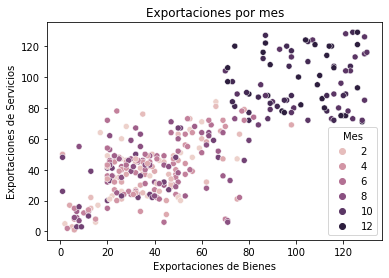

In [6]:
#sns.set_palette("viridis")
sca=exportaciones.pivot_table('Valor', index=['Gestion','Mes','Destino'], columns=['Concepto'])
#sca.reset_index(drop=True,inplace=True)
x= sns.scatterplot(data=sca, x="Bienes", y="Servicios",hue="Mes")
x.set_title("Exportaciones por mes")
x.set_xlabel("Exportaciones de Bienes")
x.set_ylabel("Exportaciones de Servicios")

##  Exportaciones totales de la gestion 2020

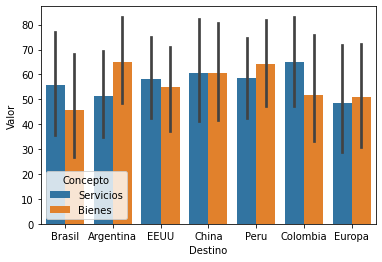

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
gestion2020= exportaciones[exportaciones['Gestion']==2020]
ax = sns.barplot(x="Destino", y="Valor",hue="Concepto" ,data=gestion2020)